In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
# https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02

In [ ]:
import re
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords, reuters
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')
! unzip /root/nltk_data/corpora/reuters.zip -d /root/nltk_data/corpora

Streaming output truncated to the last 5000 lines.
  inflating: /root/nltk_data/corpora/reuters/training/2231  
  inflating: /root/nltk_data/corpora/reuters/training/2232  
  inflating: /root/nltk_data/corpora/reuters/training/2234  
  inflating: /root/nltk_data/corpora/reuters/training/2236  
  inflating: /root/nltk_data/corpora/reuters/training/2237  
  inflating: /root/nltk_data/corpora/reuters/training/2238  
  inflating: /root/nltk_data/corpora/reuters/training/2239  
  inflating: /root/nltk_data/corpora/reuters/training/2240  
  inflating: /root/nltk_data/corpora/reuters/training/2244  
  inflating: /root/nltk_data/corpora/reuters/training/2246  
  inflating: /root/nltk_data/corpora/reuters/training/2247  
  inflating: /root/nltk_data/corpora/reuters/training/2249  
  inflating: /root/nltk_data/corpora/reuters/training/225  
  inflating: /root/nltk_data/corpora/reuters/training/2251  
  inflating: /root/nltk_data/corpora/reuters/training/2252  
  inflating: /root/nltk_data/corpor

In [ ]:
stop_words = stopwords.words("english")
stemmer = PorterStemmer()
word_re = re.compile('[a-zA-Z]+')
min_length = 3
def tokenize(text):
  words = []
  for word in word_tokenize(text):
    word = word.lower()
    if word not in stop_words:
      stemmed_word = stemmer.stem(word)
      if len(stemmed_word) >= min_length and word_re.match(stemmed_word):
        words.append(stemmed_word)
  return words

In [ ]:
docs = reuters.fileids()
train_docs_id = list(filter(lambda _: _.startswith('training/'),
docs))
test_docs_id = list(filter(lambda _: _.startswith('test/'),
docs))

In [ ]:
train_docs = list(map(reuters.raw, train_docs_id))
test_docs = list(map(reuters.raw, test_docs_id))

# Tokenisation
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
vectorizer = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)

# Learn and transform train documents
vectorised_train_documents = vectorizer.fit_transform(train_docs)
vectorised_test_documents = vectorizer.transform(test_docs)

vectorised_train_documents

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'might', 'must', "n't", 'need', 'sha', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<7769x20684 sparse matrix of type '<class 'numpy.float64'>'
	with 370244 stored elements in Compressed Sparse Row format>

In [ ]:
mlb = MultiLabelBinarizer() # since our data can have more than one labels, we're creating label matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html
# there is a good example in above link to get it
train_labels = mlb.fit_transform([reuters.categories(doc_id) for doc_id in train_docs_id])
test_labels = mlb.transform([reuters.categories(doc_id) for doc_id in test_docs_id])

classifier = OneVsRestClassifier(LinearSVC(random_state=30))
classifier.fit(vectorised_train_documents, train_labels)
 
predictions = classifier.predict(vectorised_test_documents)

In [ ]:
folders = ['soc.religion.christian',
 'sci.electronics',
 'talk.politics.misc',
 'talk.politics.guns',
 'rec.sport.hockey',
 'sci.crypt',
 'talk.religion.misc',
 'talk.politics.mideast',
 'sci.med',
 'sci.space',
 'rec.motorcycles',
 'comp.sys.mac.hardware',
 'comp.graphics',
 'rec.autos',
 'misc.forsale',
 'comp.windows.x',
 'comp.os.ms-windows.misc',
 'alt.atheism',
 'rec.sport.baseball',
 'comp.sys.ibm.pc.hardware']

In [ ]:
#@title Y - Target
Y = ['soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'sci.electronics', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.misc', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'talk.politics.guns', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'rec.sport.hockey', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'sci.crypt', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'talk.politics.mideast', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.med', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'sci.space', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'rec.motorcycles', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'rec.autos', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'misc.forsale', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.windows.x', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'comp.os.ms-windows.misc', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'rec.sport.baseball', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware']

In [ ]:
import sklearn.neighbors
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import model_selection

newsdata = fetch_20newsgroups(subset='all', categories=Y)

vectorizer = TfidfVectorizer()

#____ Preprocessing on data using Tf-Idf_____#
X = vectorizer.fit_transform(newsdata.data)
y = newsdata.target

print("-----------------------------------------------------------------------------")
X = X[:, :2]
print(X.shape)
# print(X)

y *= 255
y = y // 19003

y = np.sort(y)

print(y.shape)
print(y)
print("-----------------------------------------------------------------------------")

-----------------------------------------------------------------------------
(18846, 2)
(18846,)
[  0   0   0 ... 255 255 255]
-----------------------------------------------------------------------------


In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    # z_min, z_max = z.min() - 1, z.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy,**params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=2, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [ ]:
model = svm.SVC(kernel='poly', gamma=1, C=1, decision_function_shape='ovo')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of poly SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0.data, X1.data, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

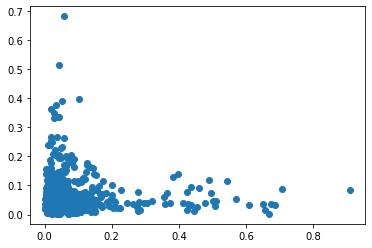

In [ ]:
# shaping data for training the model
plt.scatter(X0.data[:690], X1.data[:690])
plt.show()

No handles with labels found to put in legend.


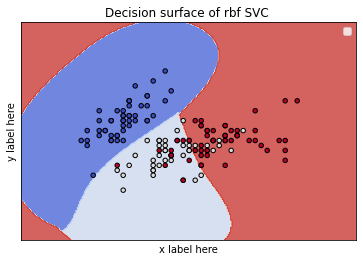

In [ ]:
model = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of rbf SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

No handles with labels found to put in legend.


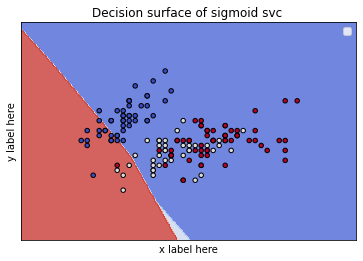

In [ ]:
model = svm.SVC(kernel='sigmoid')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of sigmoid svc ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()